<img src="https://static.voices.com/wp-content/uploads/History-of-Audiobooks.jpg" width="700" height="400">

 # Programming for Data Analysis Project
## Introduction and Project Overview
***
### Objectives of the Project:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

For this project I've decided to research the statistics for audiobooks services which becoming more popular every year. As a person who loves both audiobooks and statistics, I was curious to find out things like, who listens to audiobooks, how many books does the average audiobook listener go through in a year, and how many new audiobooks are published. 

I'll pick a selection of relevant variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information.

First of all I decided to look at my personal statistics which is readily available for my from my audible app. I’ve been a member since April 2016 and in total for that period (till July 2022) I’ve listened for the audiobooks for 2 months 14 days 15 hours and 16 minutes = 108 734.128 minutes, well done me! Looking back at last 5 months, March and April have the highest listening time, both at about 34 hours. On average my listening time will be around 30 hours a month. Now, it will be interesting to find out how do I compare to the average listener :)

## Research and interesting facts
***
Digital audiobooks continue to be the fastest growing segment in publishing.  Not only is the entire publishing industry making more money, but there is more choice available for customers. In 2019 audiobook sales increased by 16% in the United States and generated over 1.2 billion dollars in revenue, whereas in 2018 it only made 940 million, an increase of 25% from 2017. (https://goodereader.com/blog/audiobooks/audiobook-trends-and-statistics-for-2020)

Edison Research national survey of American audiobook listeners ages 18 and up found that the average number of audiobooks listened to per year increased to 8.1 in 2020, up from 6.8 in 2019.
The most popular audiobook genre continues to be Mysteries/Thrillers/Suspense. 57% of frequent audiobook listeners are under the age of 45; this is up from 51% in 2019. (https://www.audiopub.org/uploads/pdf/2020-Consumer-Survey-and-2019-Sales-Survey-Press-Release-FINAL.pdf)

How are people in the US listening to audiobooks? Smart speakers are becoming increasingly popular from products such as Amazon Echo, Google Home or Apple HomePod. In a recent poll from the American Audiobook Publishers Association found that 60% of respondents own a smart speaker, and 46% of smart speaker owners have used it to listen to an audiobook, which is up 31% from 2018.  Although the automobile is still the number one place where people listen to audiobooks, the home is where audiobooks are played for longer durations. (https://goodereader.com/blog/audiobooks/audiobook-trends-and-statistics-for-2020)

Women (between 30 and 49 years old) recently overtook men as a most active audiobook listeners. Audiobooks aren’t particularly popular with people 65 years and older. This group still prefers eBooks and print books.
Given the number of audiobooks people listen to and their high price compared to ebooks and even print books, it isn’t surprising that average audiobook listener comes from a higher-income household. In a 2019 survey, 30% of participants with a 75k yearly income said they had listened to at least one audiobook in the previous year. (https://www.statista.com/statistics/299808/audiobook-listening-population-in-the-us-by-household-income/) 


## Generating and analysing data
***
We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# nicer plotting
import seaborn as sns

# module for choosing from a list
from secrets import choice

# Regular expressions
import re 
import string

# python standard random library
import random

# Importing Numpy random generator and assigning it to rng variable
from numpy.random import default_rng

# Seed value 123 is set for reproduceable random data
rng = default_rng(seed=123)


# set global style for seaborn plots
sns.set_style("darkgrid")

### User ID
***

I decided that we do not need to know the names of our audiobook service members as it will not add any value into analysis. So instead, we going to distinguish them by their user ID. To generate random user ID, we going to choose 3 random letters and add two random digits to it. We going to add 100 users to our database.

In [2]:
# Setting user id list for user IDs to be stored
uid=[]

# Setting random seed for Python Random method
random.seed(123)

# A for loop for random 3 letter and random 2 digits to be generated as user IDs
for i in range(100):
    uid.append(''.join(random.choices(string.ascii_uppercase,k=3)) + ''.join(random.choices(string.digits,k=2)))

# Creating df data frame with numbered 100 users
df= pd.DataFrame()
# Adding generated user IDs to df2
df['uid'] = uid
df.head(10)  

,uid
0,BCK19
1,ANI81
2,IIG04
3,CPB34
4,XCD70
5,XOG87
6,IUF65
7,VIK75
8,RQR84
9,RJA71


### Gender 
***

Now we are going to randomly assign gender to our members. As we do not care whether there will be more men or women in our databse we do not need to specify probablity. 

In [3]:
genders = ['male', 'female']

# Random selection of gender for 100 users
gender = rng.choice(genders, size=100)
df['gender'] = gender.tolist()
df.head(10)  

,uid,gender
0,BCK19,male
1,ANI81,female
2,IIG04,female
3,CPB34,male
4,XCD70,female
5,XOG87,male
6,IUF65,male
7,VIK75,male
8,RQR84,male
9,RJA71,male


In [4]:
# We can quickly find out how many males and females are in our database
df['gender'].value_counts()

male      55
female    45
Name: gender, dtype: int64

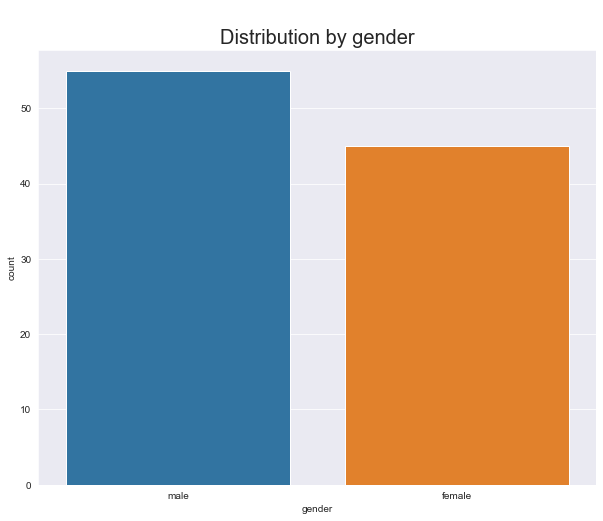

In [5]:
# set figure size
plt.rcParams["figure.figsize"] = (10,8)
sns.countplot(x= 'gender', data=df)
# set title
plt.title("\nDistribution by gender", size=20);

### Age groups
***

I thought about putting an actual age here, but it would be completely random and it would be much trikier to specify the probability of every year of age. So I decided to break it into age brackets, similar to what other people have done for this kind of analysis. There will be 4 age groups: '18-29', '30-49', '50-64', '65+'. The breakdown is going to be skewed towards left 2 ranges. Data type will be string.

According to Pew Research study, where they gathered data related to age groups and the percentage of various age groups who had consumed an audiobook in the year leading up to February, 2021. From the data provided you can see that approximately 30% of those ages 18-29 had listened to an audiobook in the year leading up to February 2021.
(https://www.pewresearch.org/fact-tank/2022/01/06/three-in-ten-americans-now-read-e-books/) So I've tried to have similar distribustion in my data.

In [6]:
# create the age_group variable
age_group = ['18-29', '30-49', '50-64', '65+']

# create new list and specifying probability
age = rng.choice(age_group, p=[0.34, 0.3, 0.24, 0.12], size=100)
df['age_group'] = age.tolist()
df.head(10) 

,uid,gender,age_group
0,BCK19,male,18-29
1,ANI81,female,18-29
2,IIG04,female,18-29
3,CPB34,male,30-49
4,XCD70,female,30-49
5,XOG87,male,30-49
6,IUF65,male,50-64
7,VIK75,male,30-49
8,RQR84,male,18-29
9,RJA71,male,50-64


In [7]:
# Now lets see the distribution by the age groups. 
df['age_group'].value_counts()

18-29    39
30-49    31
50-64    21
65+       9
Name: age_group, dtype: int64

We can quickly plot it on th pie chart to visualize it.

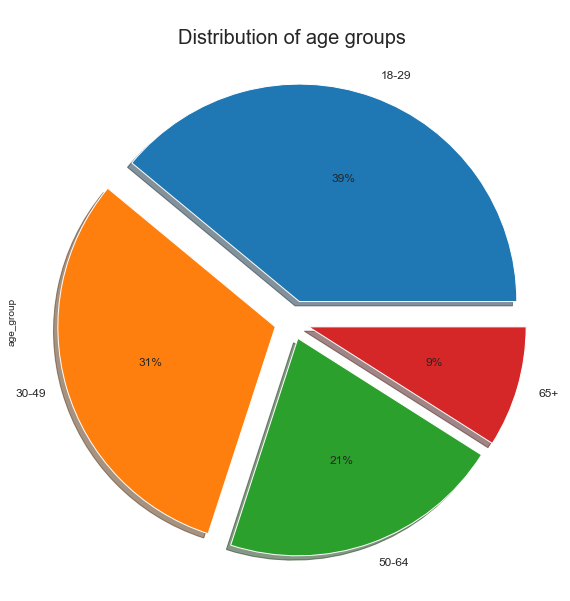

In [8]:
# create a variable for value counts
age_gr=df['age_group'].value_counts()

# set figure size
plt.rcParams["figure.figsize"] = (15,10)

explode = (0.1, 0.08, 0.08, 0.08)
# create pie chart with various parameters
ax = age_gr.plot(kind='pie', autopct='%1.0f%%', shadow=True, explode= explode, textprops={'fontsize': 12})

# set title
ax.set_title("\nDistribution of age groups", size=20);

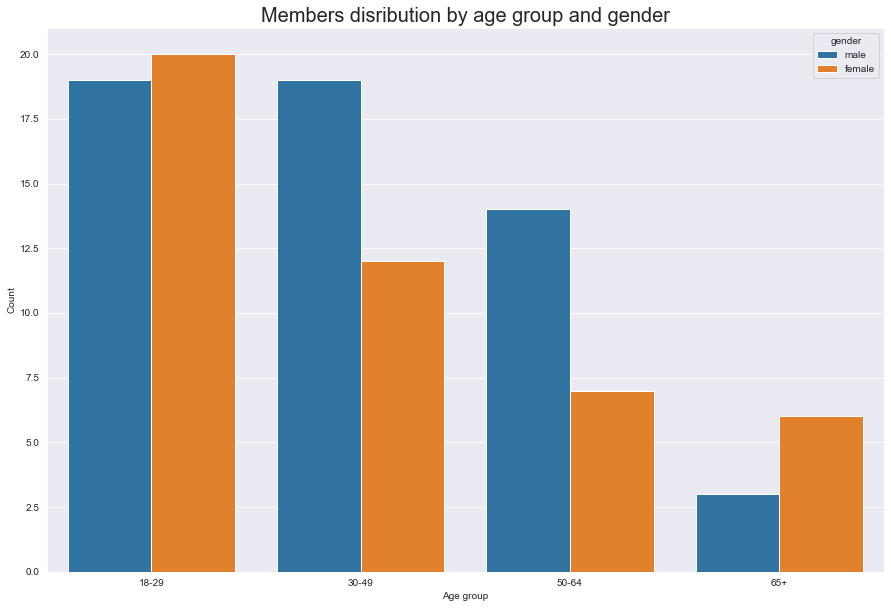

In [9]:
# Now let's see how gender distributes between different age groups using seaborn

# Setting plot parameters
sns.countplot(x='age_group', hue='gender', data=df)
plt.title('Members disribution by age group and gender', size=20)
plt.xlabel("Age group")
plt.ylabel("Count")

plt.show()

### Number of books listened to
***


I think one of the most interesting variables in our dataset will be how many books our members listen per month. So lets begin with generating monthly periods by using period_range() pandas function (https://pandas.pydata.org/docs/reference/api/pandas.period_range.html)
The part on how to combine two data frames with different lengths so that for each month we have each of the members repeating (as we want to know how many books they read each month)took me a lot of time and testing to figure out. In the end stackoverflow was my saviour as it is most of the time and I was able to find information on how to do a cross join of two data frames with no columns in common using pandas.
(https://stackoverflow.com/questions/35265613/pandas-cross-join-no-columns-in-common)

In [10]:
# Let's look at the statistics over 3 year period for each month
periods = 12*3

month = pd.period_range(start='1/1/2018', periods=periods, freq='M')
dfmonth = pd.DataFrame()
dfmonth['date'] = month

# Creating temporary column that both our data frames will have so we can merge them together
df['tmp'] = 1
dfmonth['tmp'] = 1
full = pd.merge(dfmonth, df, on=['tmp'])
# After merge is complete we can delete it
full = full.drop('tmp', axis=1)
full


,date,uid,gender,age_group
0,2018-01,BCK19,male,18-29
1,2018-01,ANI81,female,18-29
2,2018-01,IIG04,female,18-29
3,2018-01,CPB34,male,30-49
4,2018-01,XCD70,female,30-49
...,...,...,...,...
3595,2020-12,LMK88,male,50-64
3596,2020-12,ERO80,male,65+
3597,2020-12,PEO84,male,30-49
3598,2020-12,NJY80,female,18-29


In [11]:
# Saving our data to file. For now it will be re-written every time we run the code. I do this for my own check.
full.to_csv('data/comb.csv')

And now to the interesting part. For this example, we presume all of our 100 members have been members of our audiobook service for at least 3 years 2018-2020. Now we want to find out how active they were during this time listening to the books. I specifically wanted to include year 2020 as during pandemic there have been a significant increase in the listening time which we are going to account for when generating the data.

According to https://www.greatworklife.com/how-to-listen-to-audiobooks-statistics/ 32% of people listen to 2-3 books and 29% digested 4 to 7 books per month. This means that 61% of audiobook listeners are huge fans of the service.

So, let's try to simulate similar data and account for increase in 2020.

In [12]:
# First, we devide number of books read into 5 categories '0', '1', '2-3','4-6', '7+'
nbooks_arr = ['0', '1', '2-3','4-6', '7+']

# Now, as we want to show the increase in number of books that our members are listeing to, we need to have 
# different probabilities depending on the year. For every year we need 1200 entries (12months x 100 members)
nbooks2018 = rng.choice(nbooks_arr, 1200, p=[0.09, 0.24, 0.28, 0.25, 0.14])
nbooks2019 = rng.choice(nbooks_arr, 1200, p=[0.05, 0.22, 0.32, 0.30, 0.11])
nbooks20220 = rng.choice(nbooks_arr, 1200, p=[0.02, 0.15, 0.33, 0.30, 0.2])


As a next step I was trying to figure out how to split dataframe depending on the year / select the part of the dataframe depending on the year (similar to 'where' clause in SQL). After some googling I found that loc function will be the most suitable for that purpose.
https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [13]:
# splitting into separate years for testing. I'm going to use those expression below to add new field 'num_books' 
# to our dataframe 
year2018 = full.loc[full['date'] < '2019-01']
year2019 = full.loc[(full['date'] >= '2019-01') & (full['date'] < '2020-01')]
year2020 = full.loc[full['date'] >= '2020-01']
# This is to test that the code above is only selecting 1 year (in this case 2018), can be changed to any other two. 
year2018

,date,uid,gender,age_group
0,2018-01,BCK19,male,18-29
1,2018-01,ANI81,female,18-29
2,2018-01,IIG04,female,18-29
3,2018-01,CPB34,male,30-49
4,2018-01,XCD70,female,30-49
...,...,...,...,...
1195,2018-12,LMK88,male,50-64
1196,2018-12,ERO80,male,65+
1197,2018-12,PEO84,male,30-49
1198,2018-12,NJY80,female,18-29


Now, that I know how to filter our dataframe depending on the year, I was a bit struggling to find out how to add
our "nbooks" data which we have generated above to the new column depnding on the year. After a lot of experimentation, I ended up with the following solution:

In [14]:
# where year is 2018 (< 2019) we fill 'num_books' column with our generated data nbooks2018 and so on
full.loc[full['date'] < '2019-01', 'num_books'] = nbooks2018

full.loc[(full['date'] >= '2019-01') & (full['date'] < '2020-01'), 'num_books'] = nbooks2019

full.loc[full['date'] >= '2020-01', 'num_books'] = nbooks20220

# quick check
full.head(10)

,date,uid,gender,age_group,num_books
0,2018-01,BCK19,male,18-29,0
1,2018-01,ANI81,female,18-29,2-3
2,2018-01,IIG04,female,18-29,4-6
3,2018-01,CPB34,male,30-49,1
4,2018-01,XCD70,female,30-49,4-6
5,2018-01,XOG87,male,30-49,7+
6,2018-01,IUF65,male,50-64,2-3
7,2018-01,VIK75,male,30-49,1
8,2018-01,RQR84,male,18-29,7+
9,2018-01,RJA71,male,50-64,7+


In [15]:
# After playing with the dataframe, I decided it will be easier if we have an additional column 'year'
# to be able to sort and plot by it later. I used the same template as before to add it.
full.loc[full['date'] < '2019-01', 'year'] = '2018'
full.loc[(full['date'] >= '2019-01') & (full['date'] < '2020-01'), 'year'] = '2019'
full.loc[full['date'] >= '2020-01', 'year'] = '2020'
# quick check
full

,date,uid,gender,age_group,num_books,year
0,2018-01,BCK19,male,18-29,0,2018
1,2018-01,ANI81,female,18-29,2-3,2018
2,2018-01,IIG04,female,18-29,4-6,2018
3,2018-01,CPB34,male,30-49,1,2018
4,2018-01,XCD70,female,30-49,4-6,2018
...,...,...,...,...,...,...
3595,2020-12,LMK88,male,50-64,0,2020
3596,2020-12,ERO80,male,65+,4-6,2020
3597,2020-12,PEO84,male,30-49,1,2020
3598,2020-12,NJY80,female,18-29,7+,2020


Now, to the interesting part, let's see how our newly generated data looks like

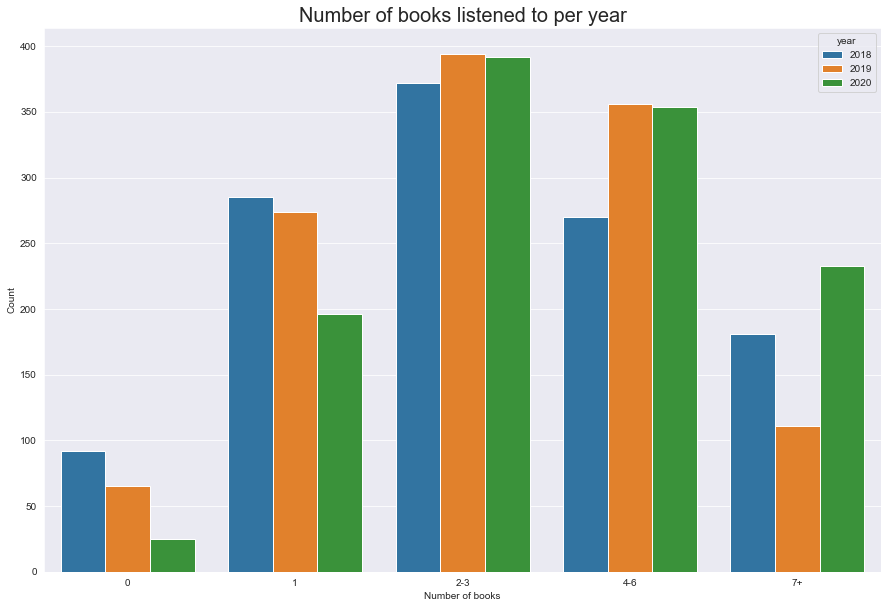

In [16]:
sns.countplot(x='num_books', order=nbooks_arr, hue='year', data=full)
plt.title('Number of books listened to per year', size=20)
plt.xlabel("Number of books")
plt.ylabel("Count")

plt.show()

After looking and experimenting with the newly added column 'num_books' I decided it will be more interesting to have a quantitative data here instead, that way we could perform much better analysis. Looking at the plot above we can see that it is close to normal distribution, however we need to be able to specify lower and upper limits (for example we obviously don't want 'num_books' parameter to be a negative number) and standard deviation, unfortunately this cannot be done with `rng.normal()` function. So I spend some time looking around before I was able to find the following solution which uses scipy.stats library:

In [17]:
#https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy
from scipy.stats import truncnorm

# we create get_truncated_normal function where we can specify the following parameters: mean, standad deviation,
#lower and upper limits
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [18]:
# here we define 3 separate sets for 3 years by passing different parameters to the function we created above, 
# as we want to show the increase in the numbers of books read
X1 = get_truncated_normal(mean=2, sd=1, low=0, upp=6)
X2 = get_truncated_normal(mean=2.8, sd=1.5, low=0.2, upp=9)
X3 = get_truncated_normal(mean=4, sd=2, low=0.8, upp=12)

# every year has 1200 values
y18=X1.rvs(1200)
y19=X2.rvs(1200)
y20=X3.rvs(1200)

In [19]:
# As we don't need 'num_books' column anymore
full = full.drop(columns=['num_books'])

In [20]:
# where year is 2018 (< 2019) we fill 'books_read' column with our generated data y18 and so on
full.loc[full['year'] == '2018', 'books_read'] = y18

full.loc[full['year'] == '2019', 'books_read'] = y19

full.loc[full['year'] == '2020', 'books_read'] = y20

# we can also round the decimal point to one as I believe it is enought precision for our analysis
full.round({'books_read':1})

,date,uid,gender,age_group,year,books_read
0,2018-01,BCK19,male,18-29,2018,4.6
1,2018-01,ANI81,female,18-29,2018,2.4
2,2018-01,IIG04,female,18-29,2018,3.0
3,2018-01,CPB34,male,30-49,2018,1.8
4,2018-01,XCD70,female,30-49,2018,0.9
...,...,...,...,...,...,...
3595,2020-12,LMK88,male,50-64,2020,4.4
3596,2020-12,ERO80,male,65+,2020,0.8
3597,2020-12,PEO84,male,30-49,2020,4.8
3598,2020-12,NJY80,female,18-29,2020,2.6


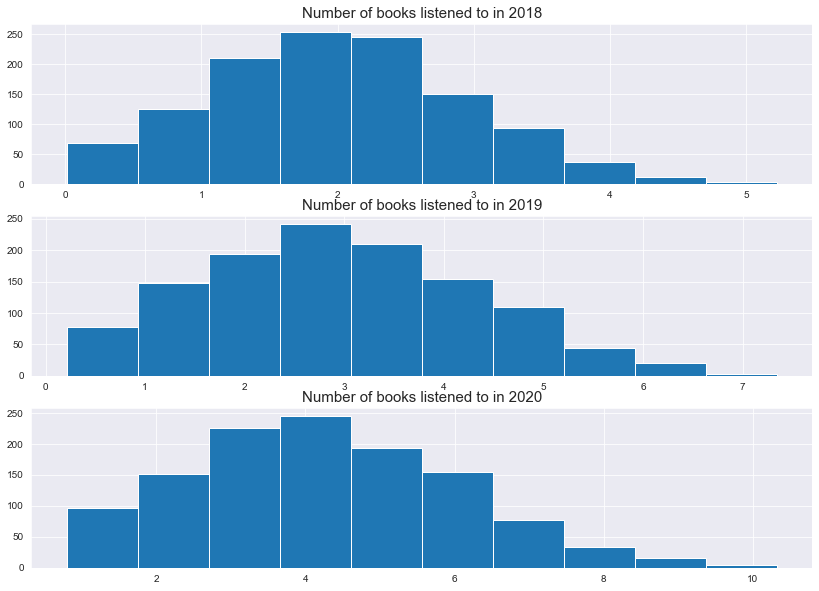

In [21]:
# Now we can have a pick how our newly created data looks like and compare how many books our members 
# listened to during 3 years
fig, axs = plt.subplots(3,figsize=(14,10))
axs[0].hist(y18)
axs[0].set_title('Number of books listened to in 2018',fontsize=15)
axs[1].hist(y19)
axs[1].set_title('Number of books listened to in 2019',fontsize=15)
axs[2].hist(y20)
axs[2].set_title('Number of books listened to in 2020',fontsize=15)

plt.show()

In [22]:
# Another handy and quick way to have a look at the summary data is by using describe() function

year2018 = full[full['year'] == '2018'].describe()
year2018

,books_read
count,1200.000000
mean,1.998625
std,0.929108
min,0.009099
25%,1.335272
50%,1.975235
75%,2.596962
max,5.225245


In [23]:
year2019 = full[full['year'] == '2019'].describe()
year2019

,books_read
count,1200.000000
mean,2.951820
std,1.373709
min,0.211578
25%,1.942063
50%,2.885259
75%,3.870027
max,7.344011


In [24]:
year2020 = full[full['year'] == '2020'].describe()
year2020

,books_read
count,1200.000000
mean,4.248955
std,1.785877
min,0.800691
25%,2.934940
50%,4.120864
75%,5.448489
max,10.318598


In [25]:
# Creating a dataframe 'means' by using groupby by year and calculating the means for each class
# Transpose the rows and columns
means = full.groupby("year").mean().T
print(means)

year            2018     2019      2020
books_read  1.998625  2.95182  4.248955


From all the above we can see that there is a significant increase in the number of books read in 2020 compared to the previous two years and there is also a growth from year to year. Looks good!

Now, let's have a bit more fun and do more visualization of our data :)

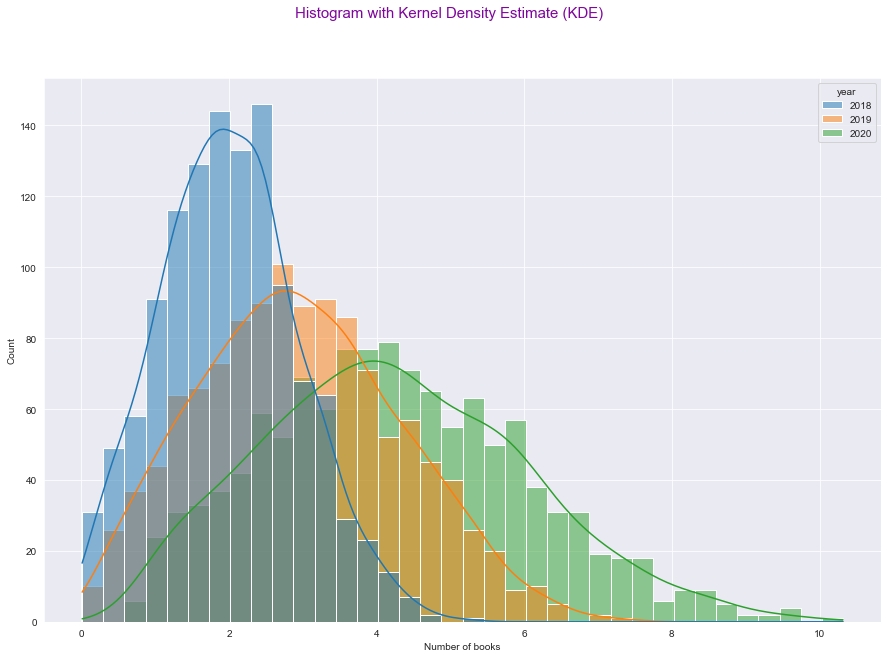

In [26]:
sns.histplot(data=full, x='books_read', hue='year', kde=True, alpha=0.5)
plt.suptitle('Histogram with Kernel Density Estimate (KDE)', fontsize=15, color='#7F069C')
plt.xlabel("Number of books")
plt.ylabel("Count")
plt.show()

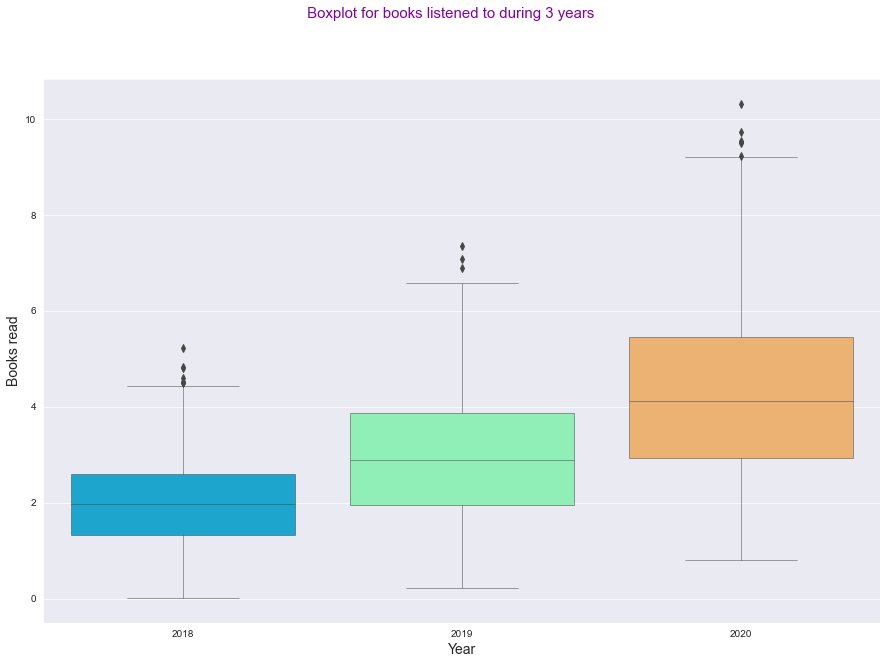

In [27]:
p = sns.boxplot( data = full, x='year', y='books_read', linewidth=0.5, palette='rainbow')
p.set_xlabel("Year", fontsize=14)
p.set_ylabel("Books read", fontsize=14) # adding y label
# adding title and specifying color and font size 
plt.suptitle(' Boxplot for books listened to during 3 years', fontsize=15, color='#7F069C') 
plt.show()

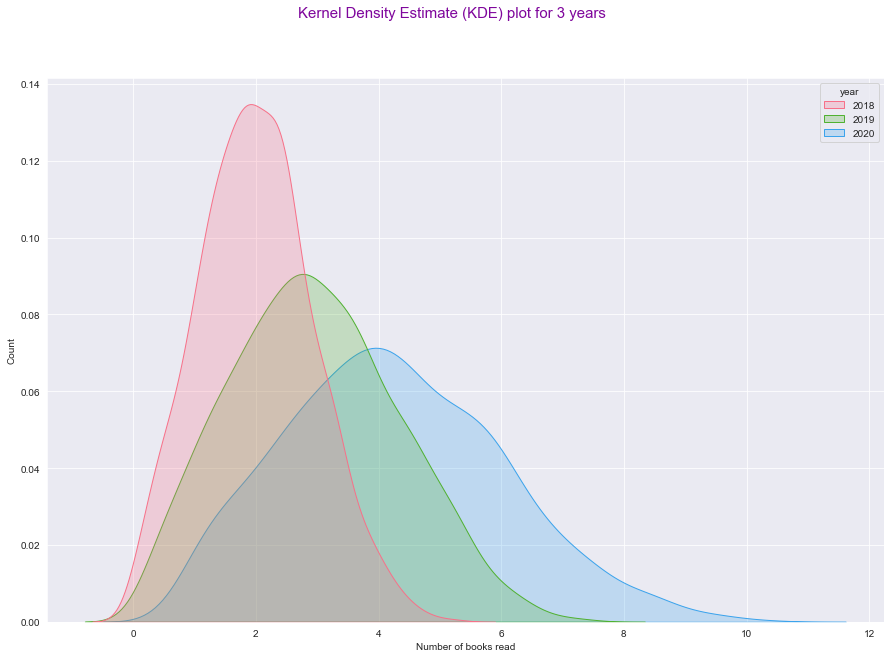

In [28]:
sns.kdeplot(data=full, x="books_read", hue="year", fill=True, palette='husl')
plt.suptitle('Kernel Density Estimate (KDE) plot for 3 years', fontsize=15, color='#7F069C')
plt.xlabel("Number of books read")
plt.ylabel("Count")
plt.show()

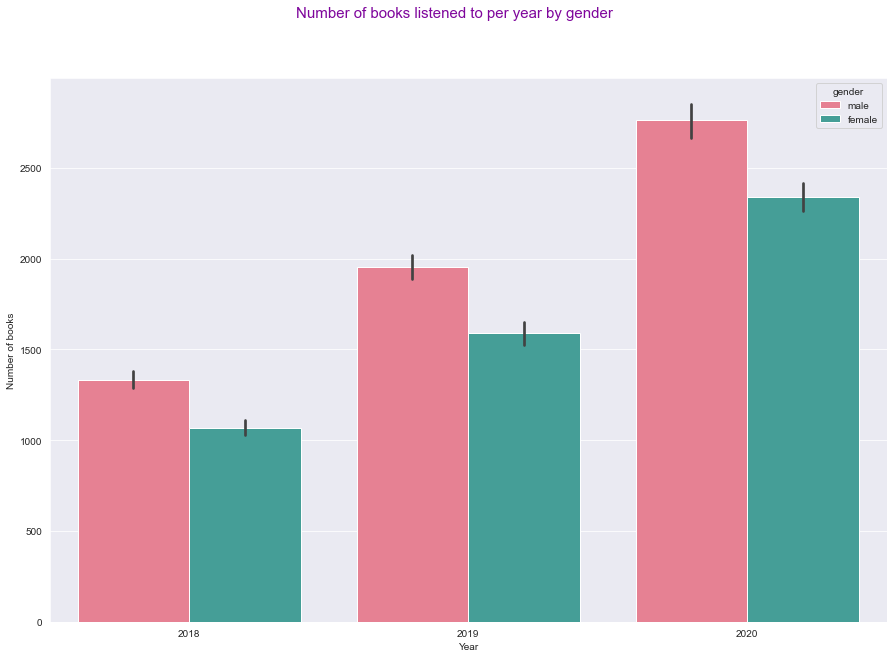

In [29]:
# Here we can see comparison male/female how many books yeach of the group read per year 

sns.barplot(x="year", y="books_read", hue="gender", data=full, estimator=sum, palette='husl')
plt.suptitle('Number of books listened to per year by gender', fontsize=15, color='#7F069C')
plt.xlabel("Year")
plt.ylabel("Number of books")
plt.show()

In [30]:
# As example we can also look at the distribution of books listened to per month for a year period, 
# in this case 2018
yr2018 = full[full['year'] == '2018']

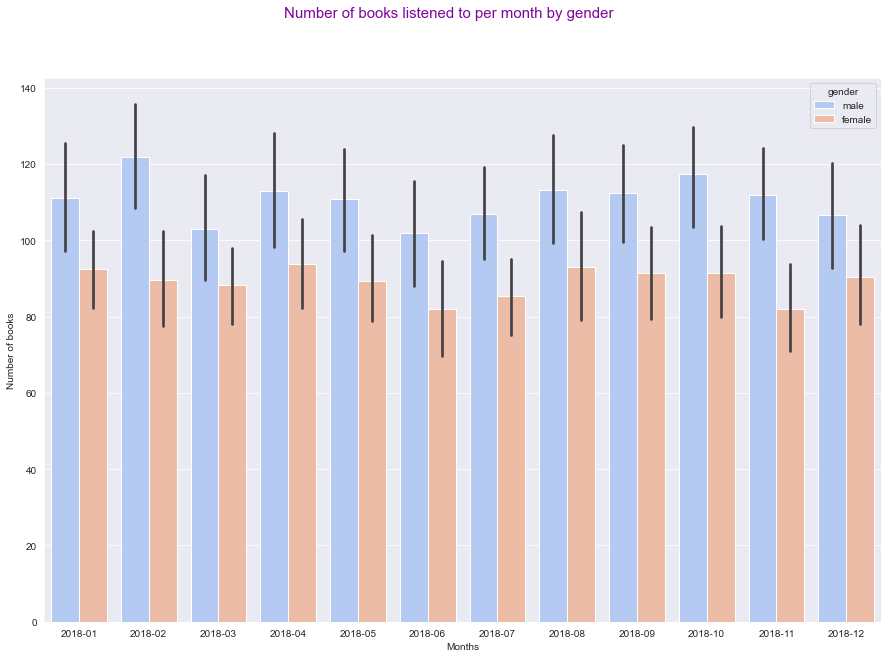

In [31]:
sns.barplot(x="date", y="books_read", hue="gender", data=yr2018, estimator=sum, palette='coolwarm')
plt.suptitle('Number of books listened to per month by gender', fontsize=15, color='#7F069C')
plt.xlabel("Months")
plt.ylabel("Number of books")
plt.show()

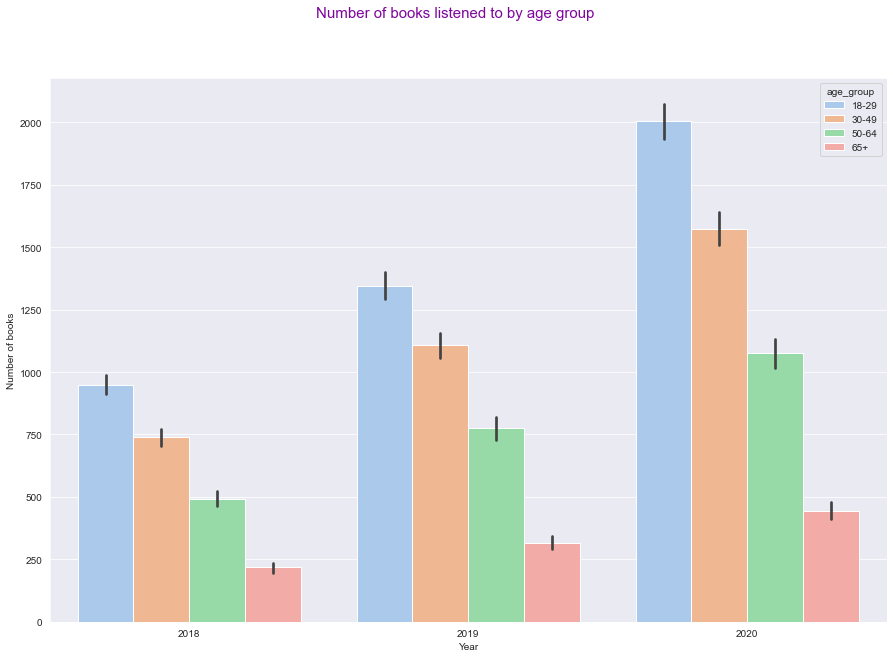

In [32]:
# Now we can compare how many books were listened depending on age group
sns.barplot(x="year", y="books_read", hue="age_group", data=full, estimator=sum, palette='pastel')
plt.suptitle('Number of books listened to by age group', fontsize=15, color='#7F069C')
plt.xlabel("Year")
plt.ylabel("Number of books")
plt.show()

In [33]:
full['age_group'].value_counts()

18-29    1404
30-49    1116
50-64     756
65+       324
Name: age_group, dtype: int64

In [34]:
df2= full.groupby('age_group')['books_read'].sum()
df2

age_group
18-29    4299.061095
30-49    3418.100388
50-64    2343.782828
65+       978.336094
Name: books_read, dtype: float64

In [35]:
df3= full.groupby('age_group')['books_read'].mean()
df3

age_group
18-29    3.062009
30-49    3.062814
50-64    3.100242
65+      3.019556
Name: books_read, dtype: float64

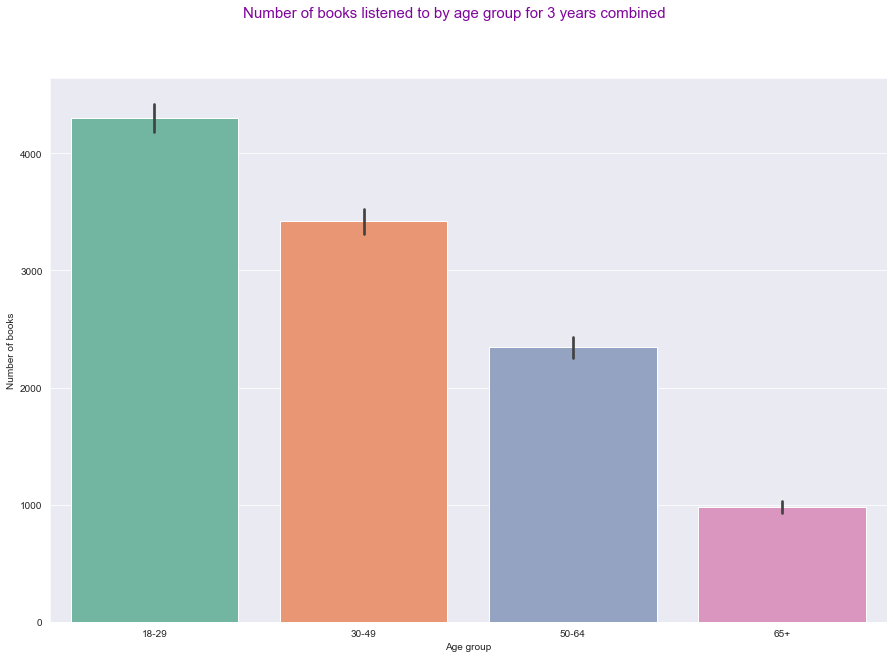

In [36]:
sns.barplot(x="age_group", y="books_read", data=full, estimator=sum, palette='Set2')
plt.suptitle('Number of books listened to by age group for 3 years combined', fontsize=15, color='#7F069C')
plt.xlabel("Age group")
plt.ylabel("Number of books")
plt.show()

### Genres
https://forcreators.com/popular-audiobook-categories-2021/
https://www.audiopub.org/uploads/pdf/Consumer-and-Sales-Survey-Press-Release-2021-FINAL.pdf

This category will not be very realistic if you look at the individual member, as we presume here that a member listens to the same genre in one given month and we randomly assign genres for the rest of the months, so our users will not necessary have a 'favourite' genre.

In [37]:
# Selecting most popular audiobook genres.
genres = ['Mysteries/Thrillers', 'Sci-Fi & Fantasy', 'Non-fiction', 'Romance', 'Children', 'Business', 'Podcasts', 
        'History', 'Comedy']
# Setting probability for each category
probability = [0.22, 0.18, 0.07, 0.15, 0.02, 0.09, 0.12, 0.04, 0.11]
# Adding genre column to the dataframe
genre = rng.choice(genres, p=probability, size=(len(full)))
full['genre'] = genre.tolist()

In [38]:
# Here is how our dataframe looks now
full.head(10)

,date,uid,gender,age_group,year,books_read,genre
0,2018-01,BCK19,male,18-29,2018,4.590548,Business
1,2018-01,ANI81,female,18-29,2018,2.396932,Mysteries/Thrillers
2,2018-01,IIG04,female,18-29,2018,3.039369,Mysteries/Thrillers
3,2018-01,CPB34,male,30-49,2018,1.768878,Sci-Fi & Fantasy
4,2018-01,XCD70,female,30-49,2018,0.850522,Podcasts
5,2018-01,XOG87,male,30-49,2018,2.473424,Podcasts
6,2018-01,IUF65,male,50-64,2018,2.473603,Mysteries/Thrillers
7,2018-01,VIK75,male,30-49,2018,3.123209,Business
8,2018-01,RQR84,male,18-29,2018,1.700778,Non-fiction
9,2018-01,RJA71,male,50-64,2018,0.423291,Comedy


Now we can check what were the most popular genres our members liked to listen to. As example we can take year 2018 and use value_counts() function to see how many rows contain particular genre un 2018

In [45]:
yr2018 = full[full['year'] == '2018']
yr2018.genre.value_counts()

Mysteries/Thrillers    249
Sci-Fi & Fantasy       216
Romance                196
Podcasts               147
Business               121
Comedy                 113
Non-fiction             91
History                 48
Children                19
Name: genre, dtype: int64

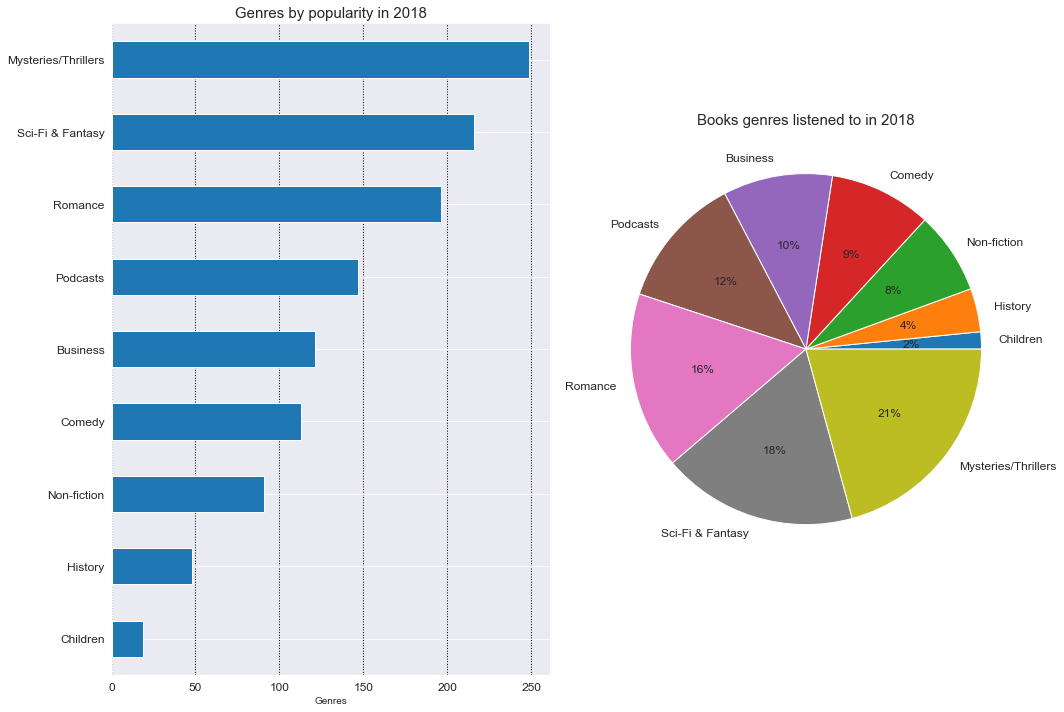

In [44]:
# 2018 genres by popularity bar plot
plt.subplot(1,2,1) # Side by side subplots
yr2018.genre.value_counts().sort_values().plot(kind = 'barh', fontsize=12)

plt.grid(axis='x', c='black', ls=':', lw='1')
plt.title('Genres by popularity in 2018', fontsize=15)
plt.xlabel("Genres")

# 2018 genres by popularity pie plot
plt.subplot(1,2,2) # Side by side subplots
yr2018.genre.value_counts().sort_values().plot(kind = 'pie', autopct='%1.0f%%', fontsize=12)

plt.title('Books genres listened to in 2018', fontsize=15)
plt.ylabel("")

plt.tight_layout()
plt.show()